## Business Case

A home renovation contract team has employed the services of data scientists to create a model predicting how much a house will sell for in the King County, WA area.

Given the 'kc_house_data.csv' file', the data scientist team is expected to:

- Build an accurate predictive model

- Report some of the primary features of a house that will increase the price so the company will know what to focus their efforts on 

- Build a calculator that represents the model.

## Importing and Cleaning Data

In this phase, we'll import the raw data from the 'kc_house_data.csv' file. We will check to see if our column exhibits the correct data types, check for any missing data, and check for duplicate entries. After finding any discrepancies in our data set, we will fix them on the spot. 

We will also expand the column 'date' into columns 'month' and 'year'. 
We will also expand the columns 'yr_renovated' and 'sqft_basement' into a column that indicates if the house 'does' or 'does not' include those specific features.

At the end of this stage, we will export the cleaner version of the raw data in the file name "data\Cleaned_raw_kc_house_data.csv"

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

from IPython.display import display
pd.set_option('display.max_columns', None)

In [2]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


> The table above shows the features that are presented in the raw data. As well as indicates that we are missing values in 'waterfront', 'view', 'yr_renovated'.
>
>The table also shows that the data types are wrong from a programming standpoint, in the features: 'price', 'waterfront', 'view', 'sqft_basement', 'yr_renovated'                     

In [4]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [5]:
#changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [6]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [7]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [8]:
#converting 'yr_renovated' and 'sqft_basement' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)
df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [9]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
price               21597 non-null int32
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null int32
view                21597 non-null int32
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null int32
yr_built            21597 non-null int64
yr_renovated        21597 non-null int32
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
month_sold          21597 non-null int64
year_sold           21597 non-null int64
sold_spring_time    21

> The above table exemplifies that there is no missing values.   
> All of the data is the correct data types



In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,0,0,0,1,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,1,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,0,0,0,1,0,1
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,1,0,0,0,0,0


> We will now create a new .csv file to act as a "save point" for future works.

In [12]:
# exports a clean version of raw data.
df.to_csv('data\Cleaned_raw_kc_house_data.csv')

## EDA and Scrubbing

In this stage, we will take an in-depth look into every column. For the sake of making our regression model accurate, we will deal with any outliers and check for linearity.

Histograms and Box-plots are a nice tool to find any outliers.  
Scatter plots works nicely for a quick visualization for linearity.

This is where we start making decisions on what kind of data should belong in our model.

### price

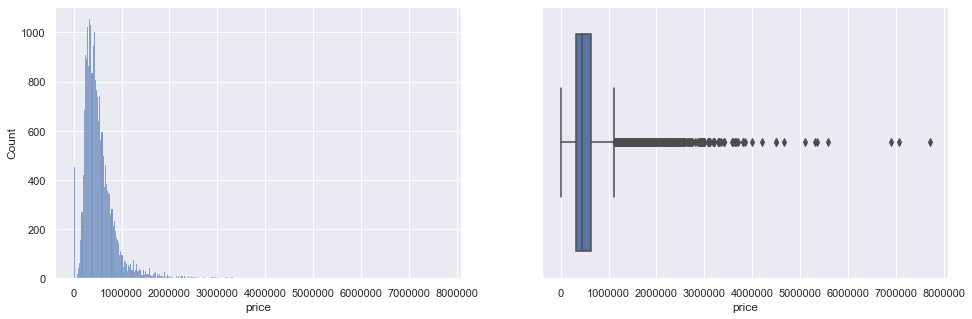

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

#looking for potential outliers
sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

In [14]:
#Making the 'price' benchmark between $150,000 to $710,000
df.drop(df[df['price'] > 710000].index, inplace = True)
df.drop(df[df['price'] < 150000].index, inplace = True)

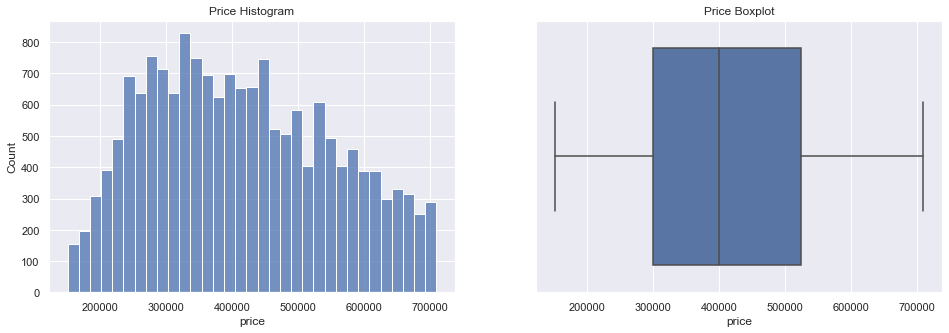

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='price', ax = ax[0]).set_title('Price Histogram')
sns.boxplot(data=df, x='price', ax=ax[1]).set_title('Price Boxplot');

>The histogram and boxplot looks to be more normally distributed after removing outliers

### bedrooms

In [16]:
df['bedrooms'].value_counts()

3     8435
4     4686
2     2477
5      908
1      170
6      151
7       17
8        7
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

>the table above points out the outliers in our data set on how many bedrooms each house have

In [17]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [18]:
df['bedrooms'].value_counts()

3    8435
4    4686
2    2477
5     908
1     170
6     151
Name: bedrooms, dtype: int64

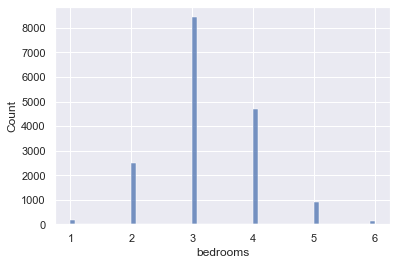

In [19]:
sns.histplot(data = df, x='bedrooms');

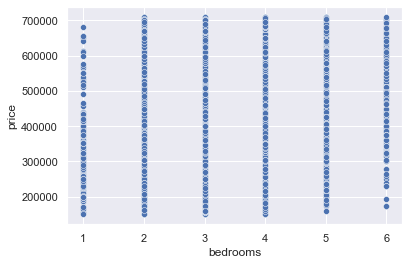

In [20]:
sns.scatterplot(x='bedrooms', y='price', data=df);

### bathrooms

In [21]:
df['bathrooms'].value_counts()

2.50    4134
1.00    3512
1.75    2713
2.00    1696
2.25    1660
1.50    1300
2.75     738
3.00     453
3.50     257
3.25     218
0.75      62
3.75      25
4.00      20
4.50      17
1.25       7
4.25       6
5.00       3
4.75       2
0.50       2
5.25       2
Name: bathrooms, dtype: int64

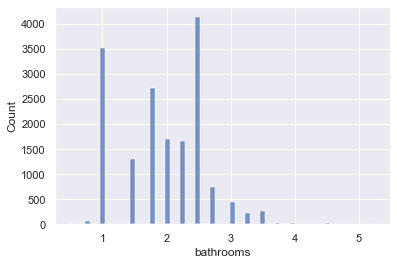

In [22]:
sns.histplot(data=df, x = 'bathrooms');

> the above table points out the outliers in our data-set on how many bathrooms each house in set have

In [23]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

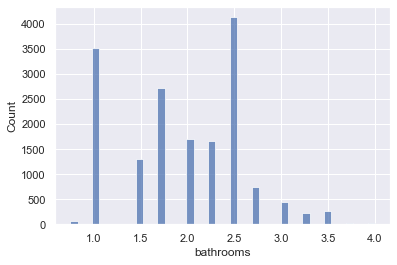

In [24]:
sns.histplot(data=df, x = 'bathrooms');

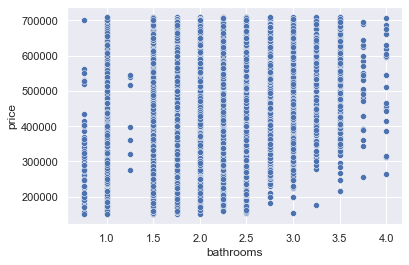

In [25]:
sns.scatterplot(x='bathrooms', y='price', data=df);

### sqft_living

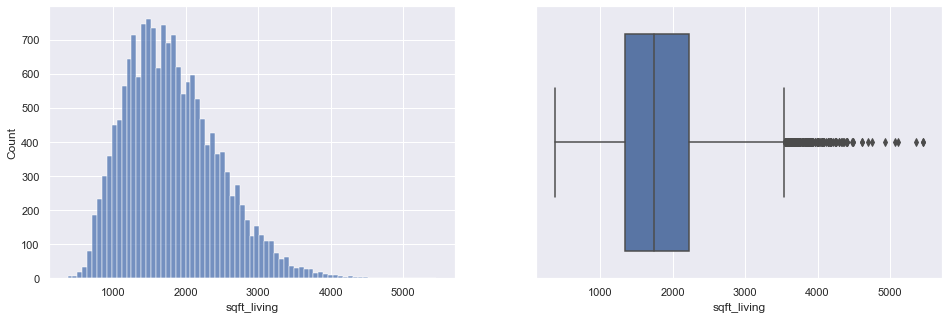

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [27]:
df.drop(df[df['sqft_living'] > 3500].index, inplace = True)

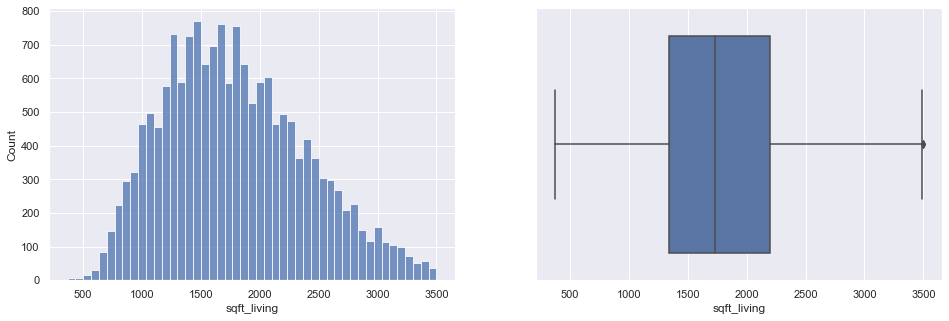

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

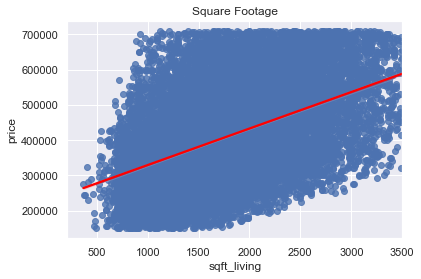

In [29]:
sns.regplot(x='sqft_living', y='price', data=df, line_kws={"color":"red"}).set_title('Square Footage');

### sqft_lot

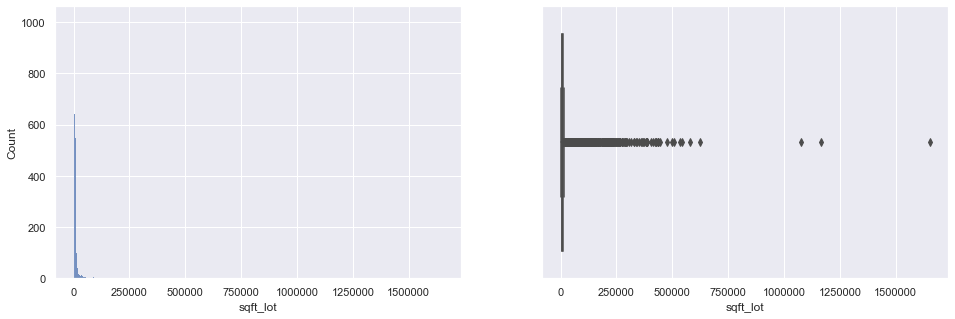

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [31]:
#df.drop(df[df['sqft_lot'] > 17500].index, inplace = True)
df.drop(df[df['sqft_lot'] > 14000].index, inplace = True)

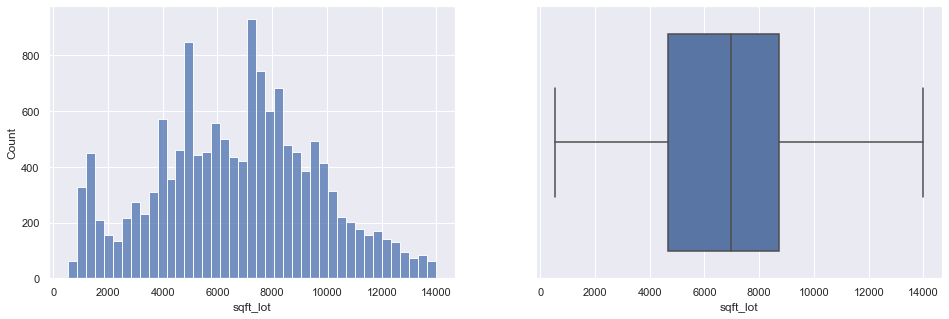

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [33]:
df['sqft_lot'].describe()

count    14406.000000
mean      6717.700403
std       2947.726005
min        520.000000
25%       4667.000000
50%       6967.000000
75%       8709.750000
max      14000.000000
Name: sqft_lot, dtype: float64

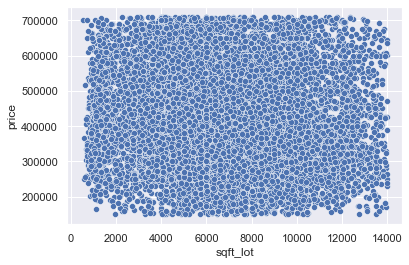

In [34]:
sns.scatterplot(x='sqft_lot', y='price', data=df);

> There is no trend between the size of the lot compared to the value of the house

### sqft_basement

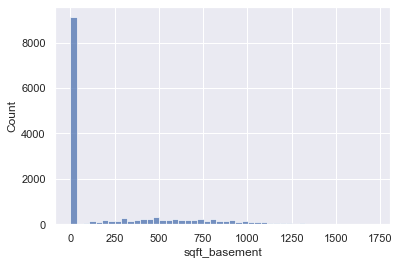

In [35]:
sns.histplot(data=df, x='sqft_basement');

In [36]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

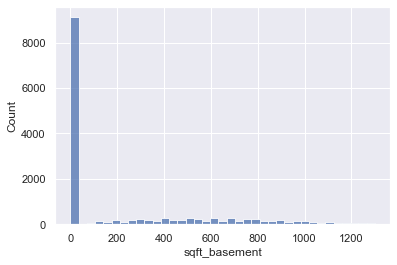

In [37]:
sns.histplot(data = df, x='sqft_basement');

#### has_basement

Turning the 'sqft_basement' column into a boolean value due to being a significant number of homes that does not have a basement

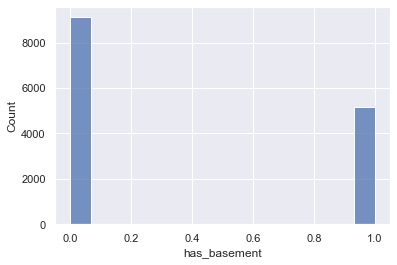

In [38]:
sns.histplot(data = df, x='has_basement');

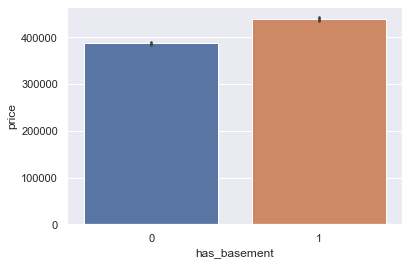

In [39]:
sns.barplot(data=df, x='has_basement', y='price');

### floors

In [40]:
df['floors'].value_counts()

1.0    7791
2.0    4739
1.5    1220
3.0     481
2.5      56
3.5       6
Name: floors, dtype: int64

In [41]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [42]:
df['floors'].value_counts()

1.0    7791
2.0    4739
1.5    1220
3.0     481
2.5      56
Name: floors, dtype: int64

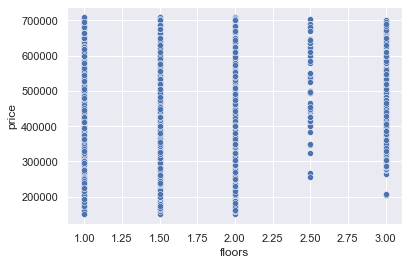

In [43]:
sns.scatterplot(data=df, x='floors', y='price');

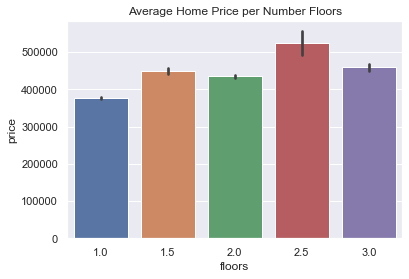

In [44]:
sns.barplot(data=df, x='floors', y='price').set_title('Average Home Price per Number Floors');

### grade and condition

The grade is representing the construction quality of the house ranging from average homes up to mansions level. While the condition is more self-explanatory meaning the condition quality of the house, as in is it well kept?

In [45]:
df['grade'].value_counts()

7     7427
8     4074
6     1688
9      855
5      145
10      86
4       10
11       1
3        1
Name: grade, dtype: int64

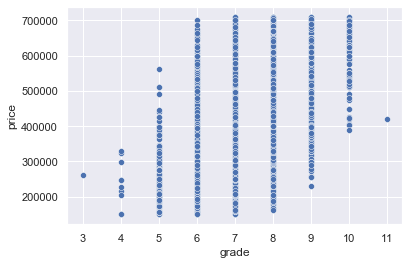

In [46]:
sns.scatterplot(data=df, x='grade', y='price');

In [47]:
df['condition'].value_counts()

3    9395
4    3710
5    1062
2     107
1      13
Name: condition, dtype: int64

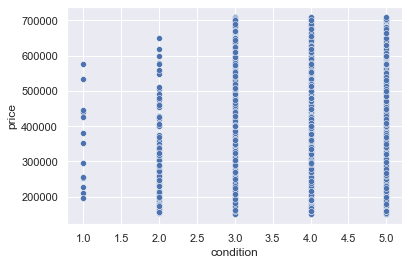

In [48]:
sns.scatterplot(data=df, x='condition', y='price');

### sqft_lot15

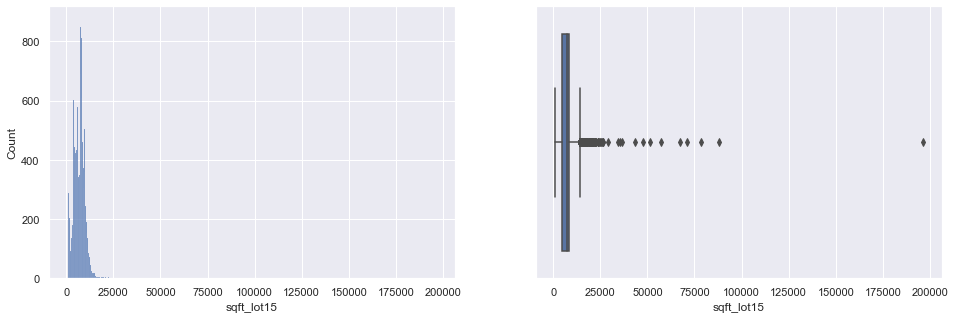

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [50]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

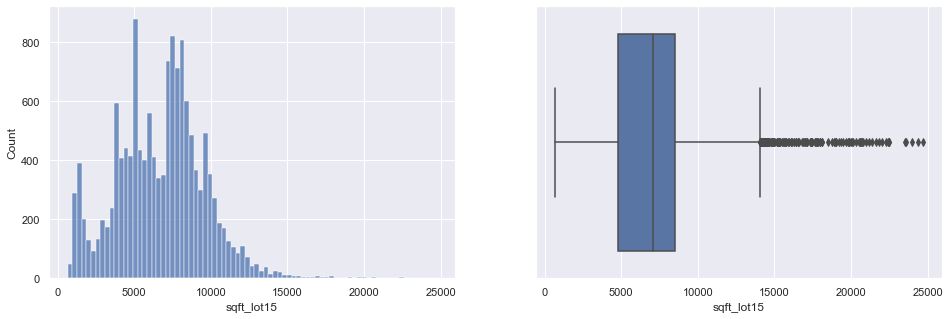

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

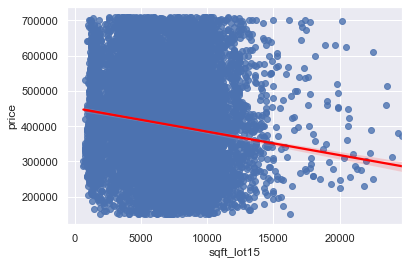

In [52]:
sns.regplot(x='sqft_lot15', y='price', data=df, line_kws={"color":"red"});

### sqft_living15

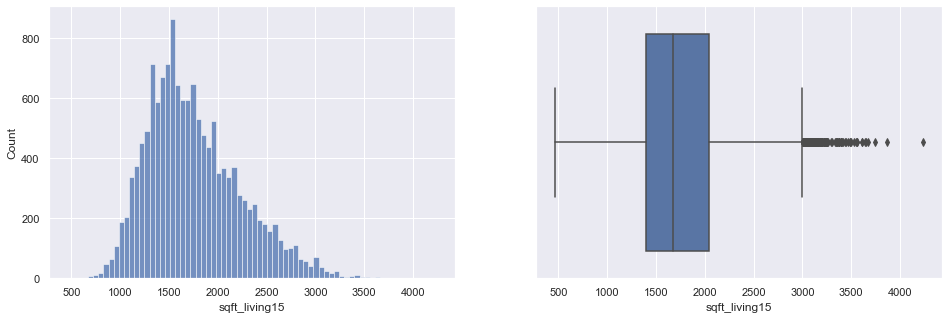

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living15', ax = ax[0])
sns.boxplot(data=df, x='sqft_living15', ax=ax[1]);

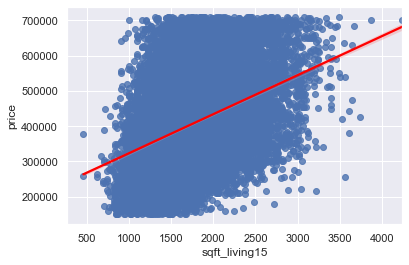

In [54]:
sns.regplot(x='sqft_living15', y='price', data=df, line_kws={"color":"red"});

### date

In [55]:
df['year_sold'].value_counts()

2014    9615
2015    4655
Name: year_sold, dtype: int64

> deleting year_sold for not having a variety of years being sold recorded.

In [56]:
df.drop('year_sold', axis=1, inplace=True)

### waterfront

In [57]:
df['waterfront'].value_counts()

0    14263
1        7
Name: waterfront, dtype: int64

Dropping 'waterfront' column as there is almost no waterfront home in this dataset after adjusting the price range

In [58]:
df.drop('waterfront', axis=1, inplace=True)

### view

In [59]:
df['view'].value_counts()

0    13616
2      370
1      140
3      121
4       23
Name: view, dtype: int64

### zipcode

C:\Users\Deric\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


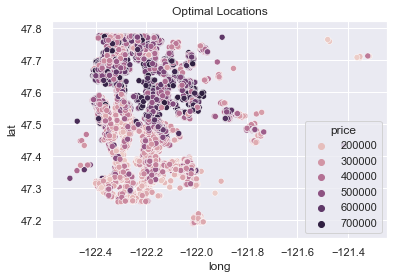

In [60]:
sns.scatterplot(df.long, df.lat, hue=df.price).set_title('Optimal Locations');

In [61]:
# zipcode count
frequency = df.groupby('zipcode')['price'].count()

In [62]:
#avg price per zipcode
mean = df.groupby('zipcode').mean()['price']

In [63]:
#new df
cluster = pd.concat([frequency, mean], axis=1)

In [64]:
cluster['zipcode'] = cluster.index

In [65]:
cluster.columns = ['frequency','price', 'zipcode']
cluster.describe()

,frequency,price,zipcode
count,69.000000,69.000000,69.000000
mean,206.811594,418209.858225,98077.855072
std,125.972018,114189.310637,56.845062
min,16.000000,237994.197740,98001.000000
25%,113.000000,302010.162281,98029.000000
50%,209.000000,421888.487179,98070.000000
75%,263.000000,511615.906103,98118.000000
max,458.000000,632148.153846,98199.000000


In [66]:
# creating "cheap" group that sell below mean price(454585)
cluster_cheap = cluster[cluster.price < 454585]

# temporary cluster of the houses that sell above mean price
cluster_temp = cluster[cluster.price >= 454585]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_cheap_low_volume = cluster_cheap[cluster_cheap.frequency < 330]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_cheap_high_volume = cluster_cheap[cluster_cheap.frequency >= 330]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 278]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 280]

In [67]:
def get_zipcode_category(zipcode):
    # returns category from clusters
    if zipcode in cluster_cheap_low_volume.index:
        return 'cheap_low_volume'
    elif zipcode in cluster_cheap_high_volume.index:
        return 'cheap_high_volume'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'

In [68]:
# applying function and returning to a new column 'zipcode type'
df['zipcode_type'] = df.zipcode.apply(get_zipcode_category)

# viewing how our clusters look
df.zipcode_type.value_counts()


cheap_low_volume         4902
cheap_high_volume        4009
expensive_low_volume     3736
expensive_high_volume    1623
Name: zipcode_type, dtype: int64

## Preprocessing data

In this phase, we will be handling our correlated and categorical features. Once we finish this step we will be able to use this data set for our first regressive model.

The idea behind regression is that you should be able to change one predictor and observe the change in outcome. This is where the error of multicollinearity comes in. Instead of changing one predictor, there is a chance you might change other predictors due to high multicollinearity.

We are using 'One-Hot encoding' to deal with our categorical features. We do this by turning our categorical features into multiple binary features, so our algorithm does not mistake our categorical features as a continuous feature. 


### Multicollinearity 

In [69]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
              'lat', 'long', 'sqft_living15', 'sqft_lot15']]

data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot15, sqft_lot)",0.866612
"(sqft_above, sqft_living)",0.819687
"(sqft_living15, sqft_living)",0.703033


>The table above identifies the highly correlated continuous columns. 
>
>We will drop 'sqft_above', 'sqft_living15', and 'sqft_lot15' for our dataset to model on.  
>Also dropping 'lat' and 'long' because we will use our zipcode values.

In [70]:
#creating seperate dataframe from the original to make the changes
df_b = df

In [71]:
#dropping the multicollinearies and unwanted columns
df_b.drop('lat', axis = 1, inplace = True)
df_b.drop('long', axis = 1, inplace = True)
df_b.drop('sqft_above', axis = 1, inplace = True)
df_b.drop('sqft_living15', axis = 1, inplace = True)
df_b.drop('sqft_lot15', axis = 1, inplace = True)

### Categorical / One Hot Encoded

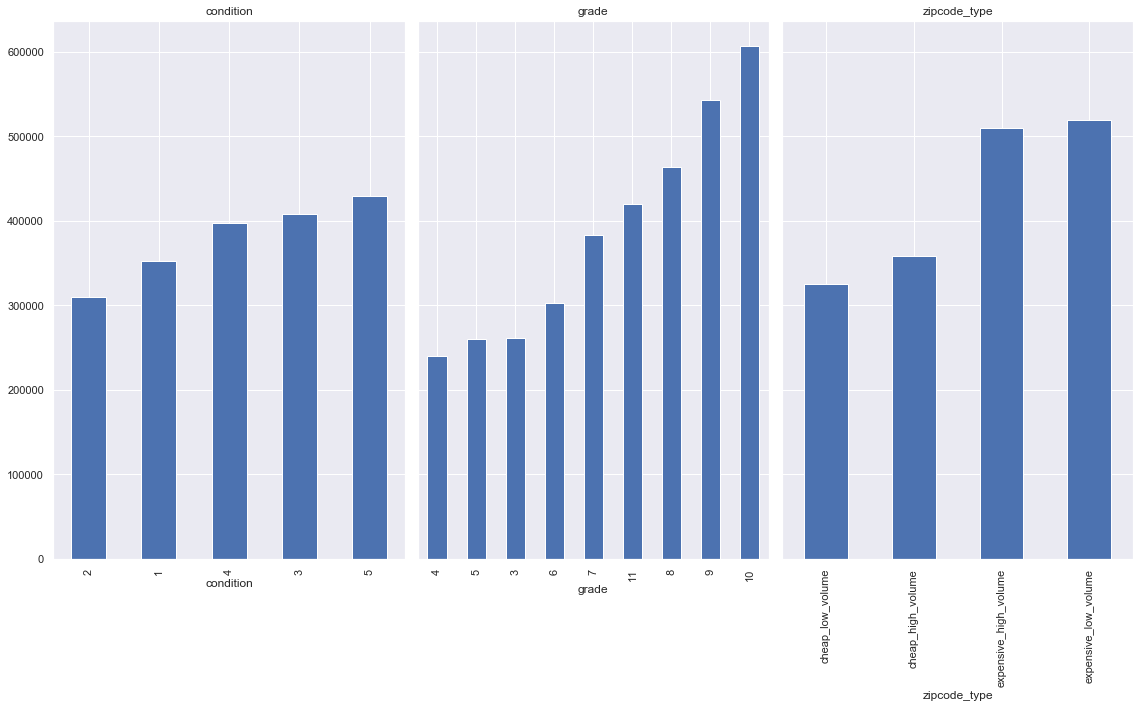

In [72]:
#looking at graphs to see columns shaped like a categorical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode_type']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [73]:
features = df[feats].astype('category')

In [74]:
feats_ohe = pd.get_dummies(features, drop_first = True)

In [75]:
feats_ohe = feats_ohe.astype(int)

In [76]:
#Checking the head of the data to make sure OHE works
feats_ohe.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


### Baseline DataFrame

We are concatenating all of the wanted features for our regression model

In [77]:
#Adding the new OHE columns
df_model = pd.concat([df_b, feats_ohe], axis = 1)

In [78]:
df_model.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'month_sold', 'sold_spring_time',
       'sold_summer_time', 'sold_fall_time', 'sold_winter_time',
       'has_renovated', 'has_basement', 'zipcode_type', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'zipcode_type_cheap_low_volume', 'zipcode_type_expensive_high_volume',
       'zipcode_type_expensive_low_volume'],
      dtype='object')

> Dropping more unwanted columns from our baseline DataFrame. Dropping 'view' because we feel like there isn't enough data to make a big difference to the model. Dropping 'yr_renovated' and 'sqft_basement' because we created a boolean versions of these columns. And dropping the 'sqft_lot' because looking at the graphs back in the scrubbing phase, there isn't really any impact on the price. This may be due to a lot of valuable homes being in Seattle city having little or no lots.
>
>Dropping 'zipcode', 'condition', 'grade', and 'zipcode_type' and replacing them with one-hot encode features

In [79]:
#dropping unwanted columns first
df_model.drop('view', axis = 1, inplace = True)
df_model.drop('yr_renovated', axis = 1, inplace = True)
df_model.drop('sqft_basement', axis = 1, inplace = True)
df_model.drop('sqft_lot', axis = 1, inplace = True)

df_model.drop('condition', axis = 1, inplace = True)
df_model.drop('grade', axis = 1, inplace = True)
df_model.drop('zipcode', axis = 1, inplace = True)

df_model.drop('zipcode_type', axis = 1, inplace = True)

In [80]:
df_model.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,month_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,221900,3,1.00,1180,1.0,1955,10,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,538000,3,2.25,2570,2.0,1951,12,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,1.0,1933,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,604000,4,3.00,1960,1.0,1965,12,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,510000,3,2.00,1680,1.0,1987,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


> Our new dataframe that were going to model on 

## First Model - Baseline


In our first model, we are going to plug in every feature from our cleaned and scrubbed dataset.

### Train-Test Split

We are doing the Train-Test Split to help make a predictive model.

In [81]:
#importing the necessary libraries for train-test split
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [82]:
y = df_model[['price']]
X = df_model.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [83]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [84]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [85]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 81576.38
RMSE Test: 81677.09


RMSE (Root Mean Square Error) is an evaluation metric that measures the average magnitude of error.
The average error between the predicted data from the actual data is 81,647

###  Model

In [86]:
from statsmodels.formula.api import ols

In [87]:
# Fitting the actual model
outcome = 'price'
x_cols = list(df_model.columns)
x_cols.remove('price')

data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     810.5
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:54:34   Log-Likelihood:            -1.4531e+05
No. Observations:               11416   AIC:                         2.907e+05
Df Residuals:                   11389   BIC:                         2.909e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.903e+06   9.32e+04     20.419      0.000    1.72e+06    2.09e+06
bedrooms                           -7177.0730   1238.395     -5.795      0.000   -9604.541   -4749.605
bathrooms                           1.145e+04   2042.704      5.604      0.000    7442.922    1.55e+04
sqft_living                           77.9202      2.262     34.451      0.000      73.487      82.354
floors                              1.532e+04   1990.263      7.696      0.000    1.14e+04    1.92e+04
yr_built                           -1180.2715     40.894    -28.861      0.000   -1260.432   -1100.111
month_sold                         -1876.2005    944.363     -1.987      0.047   -3727.316     -25.085
sold_spring_time                    4.726e+05   2.35e+04     20.085      0.000    4.26e+05    5.19e+05
sold_summer_time                    4.804e+05   2.33e+04     20.602      0.000    4.35e+05    5.26e+05
sold_fall_time                      4.739e+05   2.34e+04     20.210      0.000    4.28e+05     5.2e+05
sold_winter_time                    4.763e+05   2.39e+04     19.960      0.000     4.3e+05    5.23e+05
has_renovated                       1364.7368   5395.030      0.253      0.800   -9210.452    1.19e+04
has_basement                        1.737e+04   1836.093      9.458      0.000    1.38e+04     2.1e+04
condition_2                         5.952e+04   3.03e+04      1.962      0.050      70.443    1.19e+05
condition_3                         9.548e+04    2.9e+04      3.297      0.001    3.87e+04    1.52e+05
condition_4                         9.698e+04    2.9e+04      3.348      0.001    4.02e+04    1.54e+05
condition_5                         1.281e+05   2.91e+04      4.408      0.000    7.11e+04    1.85e+05
grade_4                             3454.1935   8.57e+04      0.040      0.968   -1.65e+05    1.72e+05
grade_5                            -2.775e+04   8.21e+04     -0.338      0.735   -1.89e+05    1.33e+05
grade_6                             5036.4943   8.18e+04      0.062      0.951   -1.55e+05    1.65e+05
grade_7                             4.705e+04   8.18e+04      0.575      0.565   -1.13e+05    2.07e+05
grade_8                              9.45e+04   8.18e+04      1.155      0.248   -6.59e+04    2.55e+05
grade_9                             1.532e+05   8.19e+04      1.870      0.062   -7390.691    3.14e+05
grade_10                             1.82e+05   8.25e+04      2.207      0.027    2.03e+04    3.44e+05
grade_11                             1.08e+04   1.16e+05      0.093      0.926   -2.16e+05    2.38e+05
zipcode_type_cheap_low_volume      -2.917e+04   1953.752    -14.932      0.000    -3.3e+04   -2.53e+04
zipcode_type_expensive_high_volume   1.41e+05   2845.120     49.550      0.000    1.35e+05    1.

>R-Squared is a statistical measure between 0 and 1 which calculates how well the regression line fits in our data set.     
>R-Squared = .65  

>the P-value (P>|t|) is a probability score that establish statistical significance of an observed effect. Lower p-values reject the null hypothesis. The null hypothesis assumes that there is little to no relationship by itself.  
> In this model there are several significant p-values.


### Checking QQ Plot

In [88]:
import statsmodels.api as sm

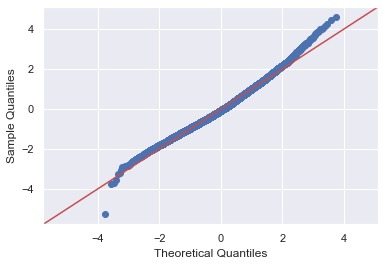

In [89]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

> the Q-Q plot helps assess if the sample comes from a known distribution such as a normal distribution. Doing this visual check helps determines if linear regression is a good choice for model.

>The Q-Q plot above is almost perfect on the line, however we can probably derive that the data set is slightly peaked in the middle.

### Checking for Homoscedasticity

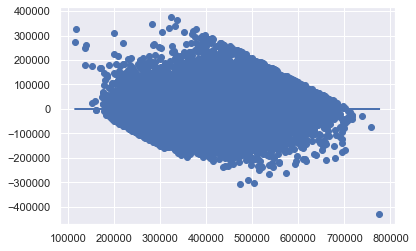

In [90]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

>Homoscedasticity indicates that the dependent variable's variability is equal across values of the independent variable   
>The grouping above looks decent aside from several outliers that are sticking out

## Second Model - Multicollinearity

In this model, we are taking another look into multicollinearity on each predictor as a whole.

### Checking and Fixing Multicollinearity

In [91]:
#Importing variance inflation factor to check for multicollinearies 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
col = df_model[x_cols]
vif = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.7503561824908507),
 ('bathrooms', 2.9875903209797467),
 ('sqft_living', 2.9127047033708964),
 ('floors', 2.0330752189602377),
 ('yr_built', 2.4948585464506694),
 ('month_sold', 14.934106838274449),
 ('sold_spring_time', 4950.698564262),
 ('sold_summer_time', 7974.019222790551),
 ('sold_fall_time', 7057.981271166961),
 ('sold_winter_time', 5778.2778147357085),
 ('has_renovated', 1.074238881139042),
 ('has_basement', 1.3259539501743285),
 ('condition_2', 9.032061144402068),
 ('condition_3', 249.1579426813766),
 ('condition_4', 212.81424471259024),
 ('condition_5', 76.8672415977923),
 ('grade_4', 11.007947996677986),
 ('grade_5', 143.75188265909114),
 ('grade_6', 1490.9301041608212),
 ('grade_7', 3570.7921642057245),
 ('grade_8', 2919.9373812615304),
 ('grade_9', 806.7861706842592),
 ('grade_10', 86.82083793324476),
 ('grade_11', 2.004765440140385),
 ('zipcode_type_cheap_low_volume', 1.469289560627165),
 ('zipcode_type_expensive_high_volume', 1.411026410407987),
 ('zipcode

In [93]:
vif_scores = list(zip(x_cols, vif))
v_test = [x for x, vif in vif_scores if vif > 10]
print(len(vif_scores), len(v_test))

27 15


>There is 15 columns that have significant multicollineary with several others

In [94]:
v_test

['month_sold',
 'sold_spring_time',
 'sold_summer_time',
 'sold_fall_time',
 'sold_winter_time',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10']

>Dropping those columns from the v_test and dropping condition and grade columns because they were the last from the one-hot encode.

In [95]:
for v in v_test:
    df_model.drop(v, axis=1, inplace=True)

In [96]:
df_model.drop('condition_2', axis = 1, inplace = True)
df_model.drop('grade_11', axis = 1, inplace = True)

In [97]:
#checking .info() to confirm the changes
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14270 entries, 0 to 21596
Data columns (total 11 columns):
price                                 14270 non-null int32
bedrooms                              14270 non-null int64
bathrooms                             14270 non-null float64
sqft_living                           14270 non-null int64
floors                                14270 non-null float64
yr_built                              14270 non-null int64
has_renovated                         14270 non-null int32
has_basement                          14270 non-null int32
zipcode_type_cheap_low_volume         14270 non-null int32
zipcode_type_expensive_high_volume    14270 non-null int32
zipcode_type_expensive_low_volume     14270 non-null int32
dtypes: float64(2), int32(6), int64(3)
memory usage: 1003.4 KB


### Train-Test Split

In [98]:
y = df_model['price']
X = df_model.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [99]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [100]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [101]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 86449.33
RMSE Test: 86785.5


>RMSE (Root Mean Square Error) is an evaluation metric that measures the average magnitude of error.  
The average error between the predicted data from the actual data is 86,729  

### Model

In [102]:
x_cols = list(df_model.columns)
x_cols.remove('price')

data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1754.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:54:36   Log-Likelihood:            -1.4597e+05
No. Observations:               11416   AIC:                         2.920e+05
Df Residuals:                   11405   BIC:                         2.920e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.841e+06   7.59e+04     24.246      0.000    1.69e+06    1.99e+06
bedrooms                           -1.175e+04   1290.358     -9.103      0.000   -1.43e+04   -9216.536
bathrooms                           1.581e+04   2137.330      7.399      0.000    1.16e+04       2e+04
sqft_living                          109.1896      2.176     50.175      0.000     104.924     113.455
floors                               2.18e+04   2060.667     10.578      0.000    1.78e+04    2.58e+04
yr_built                            -862.5359     39.474    -21.851      0.000    -939.911    -785.161
has_renovated                        730.2525   5658.663      0.129      0.897   -1.04e+04    1.18e+04
has_basement                        1.466e+04   1923.318      7.622      0.000    1.09e+04    1.84e+04
zipcode_type_cheap_low_volume      -3.222e+04   2062.842    -15.620      0.000   -3.63e+04   -2.82e+04
zipcode_type_expensive_high_volume  1.519e+05   2970.904     51.132      0.000    1.46e+05    1.58e+05
zipcode_type_expensive_low_volume   1.497e+05   2243.257     66.724      0.000    1.45e+05    1.54e+05
==============================================================================
Omnibus:                      295.104   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.049
Skew:                           0.384   Prob(JB):                     7.09e-71
Kurtosis:                       3.301   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>After dropping highly correlated predictors,   
our R-squared is .605
>
>There are still a high p-value in predictors.

### QQ Plot

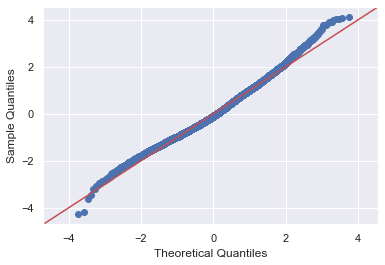

In [103]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

>The Q-Q plot has improved.

### Homoscedasticity

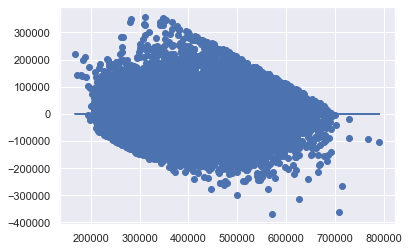

In [104]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

> The Homoscedasticity looks about the same as the last model.

## Third Model - P_Values

In this model, we are going to deal with our high p-value predictors.

### Finding and Fixing High P_Values

In [105]:
# finding the high p values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

In [106]:
#showing the high p values
high_p_values = list(p_table[p_table['P>|t|'] >= 0.05].index)
print("Our high p_values columns:", high_p_values)

Our high p_values columns: ['has_renovated']


In [107]:
for col in high_p_values:
    df_model.drop(col, axis=1, inplace=True)

In [108]:
# leaving the high p values out.
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

### Train-Test Split

In [109]:
y = df_model['price']
X = df_model[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [110]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [111]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [112]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 86449.4
RMSE Test: 86783.61


### Model

In [113]:
data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1949.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:54:37   Log-Likelihood:            -1.4597e+05
No. Observations:               11416   AIC:                         2.920e+05
Df Residuals:                   11406   BIC:                         2.920e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.843e+06   7.38e+04     24.970      0.000     1.7e+06    1.99e+06
bedrooms                           -1.175e+04   1289.601     -9.112      0.000   -1.43e+04   -9223.510
bathrooms                           1.584e+04   2128.962      7.440      0.000    1.17e+04       2e+04
sqft_living                          109.1940      2.176     50.186      0.000     104.929     113.459
floors                              2.181e+04   2057.365     10.602      0.000    1.78e+04    2.58e+04
yr_built                            -863.7190     38.392    -22.497      0.000    -938.975    -788.463
has_basement                        1.465e+04   1922.027      7.622      0.000    1.09e+04    1.84e+04
zipcode_type_cheap_low_volume      -3.222e+04   2062.306    -15.622      0.000   -3.63e+04   -2.82e+04
zipcode_type_expensive_high_volume  1.519e+05   2969.866     51.147      0.000    1.46e+05    1.58e+05
zipcode_type_expensive_low_volume   1.497e+05   2243.137     66.728      0.000    1.45e+05    1.54e+05
==============================================================================
Omnibus:                      295.225   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.181
Skew:                           0.384   Prob(JB):                     6.64e-71
Kurtosis:                       3.301   Cond. No.                     2.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>R-squared remains at .605 while there isn't any high p-values

### QQ plot

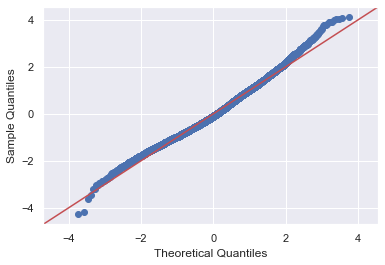

In [114]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

>No changes in the Q-Q plot observed.

### Homoscedasiticity

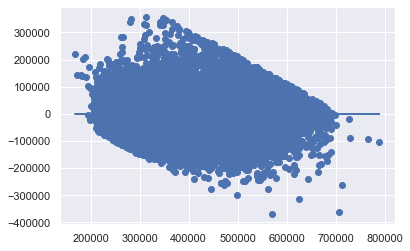

In [115]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

> Little to no changes in the homoscedasticity observed.

## Fourth Model  - Transformation

In this model, we are going to log transform 'sqft_living' feature to help with linearity.

### Adding log values to 'continuous' columns

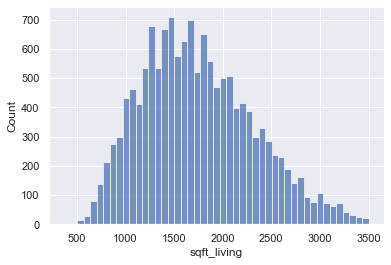

In [116]:
#taking a look at the original 'sqft_living' column
sns.histplot(data = df_model, x = 'sqft_living');

In [117]:
#preforming a log transmation on the 'sqft_living' column
df_model['sqft_living_log'] = np.log(df_model['sqft_living'])

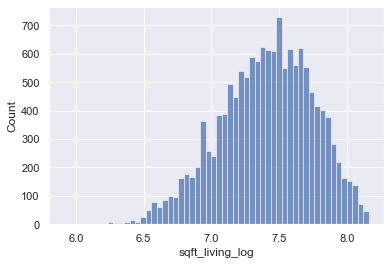

In [118]:
#taking a look at the new log transfomation of the 'sqft_living'
sns.histplot(data = df_model, x = 'sqft_living_log');

In [119]:
#Replacing the original 'sqft_living' in the dataset with the log transform version
x_cols.remove('sqft_living')
x_cols.append('sqft_living_log')

df_model.drop('sqft_living', axis=1, inplace=True)

### Train-Test Split

In [120]:
y = df_model['price']
X = df_model.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [121]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [122]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [123]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 87318.31
RMSE Test: 87727.78


### Model

In [124]:
data = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1885.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:54:38   Log-Likelihood:            -1.4608e+05
No. Observations:               11416   AIC:                         2.922e+05
Df Residuals:                   11406   BIC:                         2.923e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           7.448e+05   7.78e+04      9.568      0.000    5.92e+05    8.97e+05
bedrooms                           -1.242e+04   1324.159     -9.379      0.000    -1.5e+04   -9823.469
bathrooms                           1.603e+04   2167.048      7.399      0.000    1.18e+04    2.03e+04
floors                              2.141e+04   2078.515     10.301      0.000    1.73e+04    2.55e+04
yr_built                            -892.1104     38.789    -22.999      0.000    -968.143    -816.077
has_basement                        9442.8296   1959.058      4.820      0.000    5602.738    1.33e+04
zipcode_type_cheap_low_volume      -3.168e+04   2083.131    -15.207      0.000   -3.58e+04   -2.76e+04
zipcode_type_expensive_high_volume  1.509e+05   2999.175     50.307      0.000    1.45e+05    1.57e+05
zipcode_type_expensive_low_volume   1.494e+05   2265.757     65.935      0.000    1.45e+05    1.54e+05
sqft_living_log                     1.821e+05   3845.515     47.359      0.000    1.75e+05     1.9e+05
==============================================================================
Omnibus:                      297.419   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.498
Skew:                           0.394   Prob(JB):                     9.34e-71
Kurtosis:                       3.239   Cond. No.                     1.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The R-squared decrease to  0.598

### QQ Plot

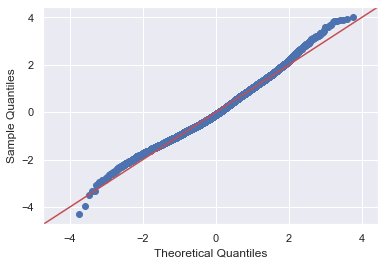

In [125]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

>The Q-Q plot shows some improvements

###  Homoscedasiticity

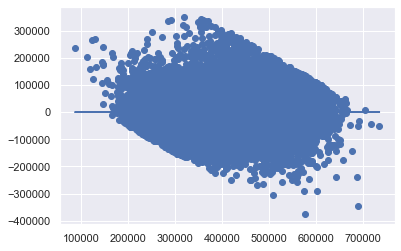

In [126]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))]);

>No changes to the homoscedasticity plot observed.

## Predictive Function

Based off our model, we created a function, a calculator that inserts the housing features to output the predictive housing prices. 

We created another calculator function that takes RMSE into account

In [127]:
def King_County_Predicting_Price(bedrooms, bathrooms, floors, yr_built, has_basement, zipcode, sqft_living):
    
    cheap_low_volume = 0
    expensive_high_volume = 0
    expensive_low_volume = 0
    
    zip_type = get_zipcode_category(zipcode)
    
    if zip_type == 'cheap_low_volume':
        cheap_low_volume = 1
    elif zip_type == 'expensive_high_volume':
        expensive_high_volume = 1
    elif zip_type == 'expensive_low_volume':
        expensive_low_volume = 1
        
    predicted_price = linreg.predict(np.array([bedrooms, bathrooms,
                                               floors, yr_built, has_basement,
                                               cheap_low_volume, expensive_high_volume,
                                               expensive_low_volume, np.log(sqft_living)])
                                     .reshape(1, -1))[0]
    
    return "$ {:,}".format(round(predicted_price))

In [128]:
bedrooms = 3
bathrooms = 2
floors = 1
yr_built = 2005
has_basement = 0
zipcode = 98178
sqft_living = 1200

print(King_County_Predicting_Price(bedrooms, bathrooms, floors, yr_built,
                                   has_basement, zipcode, sqft_living))

$ 231,927


In [129]:
def King_County_Predicting_Price_Rmse(bedrooms, bathrooms, floors, yr_built, has_basement, zipcode, sqft_living):
    
    cheap_low_volume = 0
    expensive_high_volume = 0
    expensive_low_volume = 0
    
    zip_type = get_zipcode_category(zipcode)
    
    if zip_type == 'cheap_low_volume':
        cheap_low_volume = 1
    elif zip_type == 'expensive_high_volume':
        expensive_high_volume = 1
    elif zip_type == 'expensive_low_volume':
        expensive_low_volume = 1
        
    predicted_price = linreg.predict(np.array([bedrooms, bathrooms,
                                               floors, yr_built, has_basement,
                                               cheap_low_volume, expensive_high_volume,
                                               expensive_low_volume, np.log(sqft_living)])
                                     .reshape(1, -1))[0]
    
    format_max = "${:,}".format(round(predicted_price + rmse_train))
    format_min = "${:,}".format(round(predicted_price - rmse_train))
    
    
    
    return format_min + " - " + format_max + " price range"

In [130]:
bedrooms = 3
bathrooms = 2
floors = 1
yr_built = 2005
has_basement = 0
zipcode = 98178
sqft_living = 1200

print(King_County_Predicting_Price_Rmse(bedrooms, bathrooms, floors, yr_built, has_basement, zipcode, sqft_living))

$144,609 - $319,245 price range


## Recommendations

Given the data from the 'kc_house_data.csv' file, we were successfully able to create a linear regression model for the home renovation contract team based in King County, WA. 

Looking at our model, we recommend: <br>  <br>

- Size, location and the number of floors have the biggest influences on house prices.
  
  
- It's better to have an additional bathroom over an additional bedroom  


- The 'yr_built' has the lowest impact on resale price   <br> <br>


We believe that the renovation team will be able to utilize this information to make sound decisions, to potentially increase their profits and work with efficiency when fixing homes.